<a href="https://colab.research.google.com/github/tonyjosephsebastians/100DaysMLCode/blob/main/sem2_thu_2304_assignment_1_nlp_21_11_03_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a group assignment. You can complete this assignment in groups of max 4 students

Please provide an efficient and sophisticated way to figure out what words are trending. Use the provided input which is a large collection of news texts with timestamps.

Your method and interpretation of trending is up to you but please state your rationale
and assumptions. 

The submission will be considered with regards to

• method,

• analysis,

• programming,

• communication skills,

• quality of results,

• and discussion of results

Your submission should also include proper visualization.

Hint: you should use simple technique to figure out the most repeated words and then use time series to develop a model to predict the most repeated words.
Link to data: Given in Moodle

In [ ]:
!pip install wordcloud

In [1]:
import pandas as pd
import numpy as np

import nltk
from nltk import word_tokenize

from nltk.corpus import stopwords
from string import punctuation

from nltk.stem import WordNetLemmatizer

from nltk.util import ngrams

import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk.util import ngrams
from collections import Counter
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator
import seaborn as sns

import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
# https://stackoverflow.com/questions/55806624/why-i-am-getting-runtimeerror-generator-raised-stopiteration-and-how-to-solve
!pip install nltk==3.6

     |████████████████████████████████| 1.5 MB 15.9 MB/s 
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# Hieu
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/Assignment 1 data')

# Tony
df = pd.read_csv('/content/drive/My Drive/dataset/Assignment 1 data')

#Susmi 
#df = pd.read_csv('/content/drive/My Drive/My data files/Assignment 1 data')

In [5]:
df.sample(3)

,DATE,TIME,UNIQUE_STORY_INDEX,EVENT_TYPE,PNAC,STORY_DATE_TIME,TAKE_DATE_TIME,HEADLINE_ALERT_TEXT,ACCUMULATED_STORY_TEXT,TAKE_TEXT,PRODUCTS,TOPICS,RELATED_RICS,NAMED_ITEMS,HEADLINE_SUBTYPE,STORY_TYPE,TABULAR_FLAG,ATTRIBUTION,LANGUAGE
404864,2013-06-28,12:00:03.034,20130628120000nEAP11ZSDC,STORY_TAKE_OVERWRITE,nEAP11ZSDC,2013-06-28 12:00:00,NaN,"Test, Please Ignore -- AMERS -- 06/28 08:00",NaN,"Test, Please Ignore -- AMERS -- 06/28 08:00",TEST,AGA LEN RTRS,NaN,NaN,NaN,S,False,RTRS,EN
240046,2013-06-18,13:00:15.276,20130618130001nASA05HK4,ALERT,nASA05HK4,2013-06-18 13:00:01,2013-06-18 13:00:14,AMERICAN VANGUARD -NEW FACILITY HAS A FIVE-YEA...,NaN,NaN,E U,CHE BMAT CHEM US AMERS CMPNY AGRC BLR LEN RTRS,AVD.N,NaN,NaN,S,False,RTRS,EN
411143,2013-06-28,18:34:31.445,20130628183431nTOPFIN,STORY_TAKE_OVERWRITE,nTOPFIN,2013-06-28 18:34:31,NaN,*TOP NEWS* Financial Services,NaN,"For expanded, multimedia Reuters Top News vis...",D T U E NAW RINVM NAT PSC,WEU BNK FIN INS FUND EUROP TOP CTXT CMPNY TOPA...,NaN,TOP/FIN,NaN,S,True,RTRS,EN


# Remove test data

In [6]:
df = df[df['TAKE_TEXT'].str.contains('Test, Please Ignore', regex= True, na=False)== False]
len(df)

417671

# Filter out the english records only, we should do the same for other languages

In [7]:
df = df[df['LANGUAGE'] == 'EN']

df.iloc[18]

DATE                                                             2013-06-01
TIME                                                           00:04:13.691
UNIQUE_STORY_INDEX                                 20130601000413nL2N0EC22S
EVENT_TYPE                                                         HEADLINE
PNAC                                                             nL2N0EC22S
STORY_DATE_TIME                                         2013-06-01 00:04:13
TAKE_DATE_TIME                                          2013-06-01 00:04:13
HEADLINE_ALERT_TEXT       UPDATE 1-Venezuela's economy slows sharply as ...
ACCUMULATED_STORY_TEXT                                                  NaN
TAKE_TEXT                                                               NaN
PRODUCTS                                    D T M NAT O OIL RNP DNP PTD PEN
TOPICS                    DBT COM GVD OILI MCE ECI EMRG VE LATAM ENER OI...
RELATED_RICS                                                            NaN
NAMED_ITEMS 

In [ ]:
# df.tail(5)

In [8]:
df = df[df['HEADLINE_ALERT_TEXT'].notna() | df['TAKE_TEXT'].notna()]
print(len(df))

231924


In [ ]:
#df['Text'] = df[['HEADLINE_ALERT_TEXT', 'TAKE_TEXT']].agg('-'.join, axis=1)

In [9]:

# Get all rows that have value in TAKE_TEXT column
df1 = df[df['TAKE_TEXT'].isna() == False]
# Set TAKE_TEXT to text
df1['text'] = df1['TAKE_TEXT']

# Get all rows that do not have value in TAKE_TEXT column
df2 = df[df['TAKE_TEXT'].isna()]
# Set HEADLINE_ALERT_TEXT to text
df2['text'] = df2['HEADLINE_ALERT_TEXT']

# Merge d1 and d2 to d3, so that we always have value in text column
df = df1.append(df2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [10]:
df_selected_features = df[['DATE','text']]

df_selected_features.sample(3)

,DATE,text
16213,2013-06-03,Reuters Insider - Fed 's Pianalto: more sunlig...
133386,2013-06-11,Europe Daily Earnings Hits & Misses June 11 07...
179872,2013-06-13,"For expanded, multimedia Reuters Top News vis..."


##Data preprocessing

###Tokenization — convert sentences to words
###Removing unnecessary punctuation, tags
###Removing stop words — frequent words such as ”the”, ”is”, etc. that do not have specific semantic
###stemming — words are reduced to a root by removing inflection through dropping unnecessary characters, usually a suffix.
###Lemmatization — Another approach to remove inflection by determining the part of speech and utilizing detailed database of the language.

In [11]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import re
import string
import numpy as np


In [21]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [12]:
data = df_selected_features.loc[:, 'text'].tolist()

print(type(data))
print(len(data))

<class 'list'>
231924


In [13]:
# Take a look on the data variable

for _ in range(5):
    print(data[_], "\n")

    * Haas moves three ahead after firing a 67 
    * Woods 10 off the pace after a 74 
    * Forty-two players yet to finish second round 
 
 (Updates at end of day) 
    By Mark Lamport-Stokes 
    DUBLIN, Ohio, May 31 (Reuters) - Rejuvenated by the recent 
birth of his first child, American Bill Haas rebounded from 
successive missed cuts on the PGA Tour to grab a three-shot lead 
in Friday's weather-hit second round at the Memorial Tournament. 
    While five-times champion and last year's winner Tiger Woods 
battled to a two-over-par 74 in gusting winds at Muirfield 
Village Golf Club to sit 10 strokes off the pace, Haas putted 
superbly on lightning-fast greens to fire a five-under-par 67. 
    Though Haas bogeyed his final hole, the par-four 18th, after 
hitting his approach over the back of the green, he was 
delighted to take control of the popular PGA Tour event hosted 
by Jack Nicklaus with a nine-under total of 135. 
    "I've been very fortunate," Haas told reporters after

In [14]:
# https://stackoverflow.com/questions/20078816/replace-non-ascii-characters-with-a-single-space
def _removeNonAscii(s):
   return ''.join([i if ord(i) < 128 else ' ' for i in s])
    # return "".join(i for i in s if ord(i)<128)
    
# function to remove the punctuations, apostrophe, special characters using regular expressions
def clean_text(text):
    text = text.lower()

    text = text.replace('(ap)', '')
    
    # Convert some words to full length ones
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)

    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)

    text = _removeNonAscii(text)
    
    # remove empty space left, right
    text = text.strip()

    return text

# stop words are the words that convery little to no information about the actual content like the words:the, of, for etc
def remove_stopwords(word_tokens):
    filtered_sentence = [] 
    stop_words = stopwords.words('english')
    stoplist = ["https", "co", "char","chars","wwww","Day","Top","Reuters","net","ahead","Companies","com","link","http","thomsonreuters","BreakingViews","NEWS"]
    stop_words.extend(stoplist )
   
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
   
    return filtered_sentence

# function for lemmatization 
def lemmatize(x):
    
    lemmatizer = WordNetLemmatizer()

    return' '.join([lemmatizer.lemmatize(word) for word in x])

# function to remove some too short words, special words that we know we should ignore them 
def remove_unusual_words(tokens):
  lst = [] 
 
  for token in tokens: 
    if len(token) <= 2: 
        continue

    lst.append(token)  
  
  return lst

In [15]:
tokenizer = RegexpTokenizer(r'\w+')

def tokenize(x): 
    return tokenizer.tokenize(x)

In [20]:
import re

def untokenize(words):
    """
    Untokenizing a text undoes the tokenizing operation, restoring
    punctuation and spaces to the places that people expect them to be.
    Ideally, `untokenize(tokenize(text))` should be identical to `text`,
    except for line breaks. 
    """
    
    text = ' '.join(words)

    step1 = text.replace("`` ", '"').replace(" ''", '"').replace('. . .',  '...')
    step2 = step1.replace(" ( ", " (").replace(" ) ", ") ")
    step3 = re.sub(r' ([.,:;?!%]+)([ \'"`])', r"\1\2", step2)
    step4 = re.sub(r' ([.,:;?!%]+)$', r"\1", step3)
    step5 = step4.replace(" '", "'").replace(" n't", "n't").replace(
         "can not", "cannot")
    
    step6 = step5.replace(" ` ", " '")

    return step6.strip()

# Perform data processing

In [17]:
df_selected_features['text']

18            * Haas moves three ahead after firing a 67...
23            Reuters sports schedule at 0001 GMT on Sat...
26         For expanded, multimedia Reuters Top News vis...
28            May 31 (Reuters) - A mile-wide tornado has...
32            * Economy grew 0.7 pct in Q1 vs 5.9 pct a ...
                                ...                        
421953    BUZZ-JPY ECON-Tankan big mfg DI +4, non-mfg +1...
421984    BUZZ-USD/MYR to open firm; weak commodities, o...
421986    Japan big manufacturers' mood turns positive -...
421989    BUZZ-JPY ECON-Big firms see USD/JPY averaging ...
421991    UPDATE 1-Japan big manufacturers' mood turns p...
Name: text, Length: 231924, dtype: object

In [18]:
df_selected_features['clean_text'] = df_selected_features['text'].map(clean_text)

df_selected_features['tokens'] = df_selected_features['clean_text'].map(tokenize)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
df_selected_features['tokens'] = df_selected_features['tokens'].map(remove_stopwords)
df_selected_features['tokens'] = df_selected_features['tokens'].map(remove_unusual_words)

df_selected_features['lems'] = df_selected_features['tokens'].map(lemmatize)

df_selected_features['clean_text'] = df_selected_features['tokens'].map(untokenize)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [23]:
df_selected_features

,DATE,text,clean_text,tokens,lems
18,2013-06-01,* Haas moves three ahead after firing a 67...,haas moves three firing woods pace forty two p...,"[haas, moves, three, firing, woods, pace, fort...",haas move three firing wood pace forty two pla...
23,2013-06-01,Reuters sports schedule at 0001 GMT on Sat...,reuters sports schedule gmt saturday rugby bri...,"[reuters, sports, schedule, gmt, saturday, rug...",reuters sport schedule gmt saturday rugby brit...
26,2013-06-01,"For expanded, multimedia Reuters Top News vis...",expanded multimedia reuters top news visit eik...,"[expanded, multimedia, reuters, top, news, vis...",expanded multimedia reuters top news visit eik...
28,2013-06-01,May 31 (Reuters) - A mile-wide tornado has...,may reuters mile wide tornado touched west okl...,"[may, reuters, mile, wide, tornado, touched, w...",may reuters mile wide tornado touched west okl...
32,2013-06-01,* Economy grew 0.7 pct in Q1 vs 5.9 pct a ...,economy grew pct pct year earlier slowdown fol...,"[economy, grew, pct, pct, year, earlier, slowd...",economy grew pct pct year earlier slowdown fol...
...,...,...,...,...,...
421953,2013-06-30,"BUZZ-JPY ECON-Tankan big mfg DI +4, non-mfg +1...",buzz jpy econ tankan big mfg non mfg eyed,"[buzz, jpy, econ, tankan, big, mfg, non, mfg, ...",buzz jpy econ tankan big mfg non mfg eyed
421984,2013-06-30,"BUZZ-USD/MYR to open firm; weak commodities, o...",buzz usd myr open firm weak commodities oil ex...,"[buzz, usd, myr, open, firm, weak, commodities...",buzz usd myr open firm weak commodity oil expo...
421986,2013-06-30,Japan big manufacturers' mood turns positive -...,japan big manufacturers mood turns positive bo...,"[japan, big, manufacturers, mood, turns, posit...",japan big manufacturer mood turn positive boj ...
421989,2013-06-30,BUZZ-JPY ECON-Big firms see USD/JPY averaging ...,buzz jpy econ big firms see usd jpy averaging,"[buzz, jpy, econ, big, firms, see, usd, jpy, a...",buzz jpy econ big firm see usd jpy averaging


# Count the number of words for each day

In [24]:
df_date_token = df_selected_features.assign(token=df_selected_features['tokens']).explode('token')

df_date_token = df_date_token[['DATE', 'token']].groupby(['DATE', 'token']).size().reset_index(name='counts')

df_date_token = df_date_token.sort_values(by=['counts'], ascending=False)

In [26]:
df_date_token

,DATE,token,counts
742371,2013-06-26,top,39732
815780,2013-06-28,top,39609
669573,2013-06-24,top,39240
574045,2013-06-20,top,39191
779689,2013-06-27,top,38805
...,...,...,...
624839,2013-06-23,akino,1
427980,2013-06-16,maurizio,1
624837,2013-06-23,akdag,1
624836,2013-06-23,ajmi,1


# The top 20 most frequent words over the whole timeline


In [27]:
most_20_frequent_words = df_date_token.groupby(['token']).sum().sort_values(by=['counts'], ascending=False)[:20].reset_index()

most_20_frequent_words

,token,counts
0,top,733333
1,reuters,238467
2,news,231730
3,day,141250
4,may,110027
5,said,103855
6,june,103145
7,pct,102411
8,jun,87051
9,bank,83233


In [28]:
most_100_frequent_words = df_date_token.groupby(['token']).sum().sort_values(by=['counts'], ascending=False)[:100].reset_index()

most_100_frequent_words

,token,counts
0,top,733333
1,reuters,238467
2,news,231730
3,day,141250
4,may,110027
...,...,...
95,asian,25812
96,exchange,25678
97,american,25614
98,sep,25393


# WordCloud graph : Top 100 most common words

In [ ]:
words_list = df_selected_features['tokens']

In [ ]:
allwords = []

for li  in words_list:
    for wordlist in li:
        allwords += wordlist.split()

# print(allwords)

In [ ]:
len(allwords)

20963889

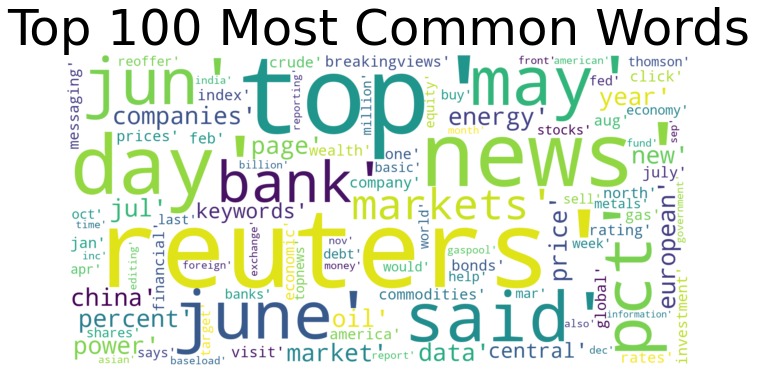

In [ ]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))

fig = plt.figure(figsize=(15,5), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")

plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=50)
plt.tight_layout(pad=0)

plt.show()


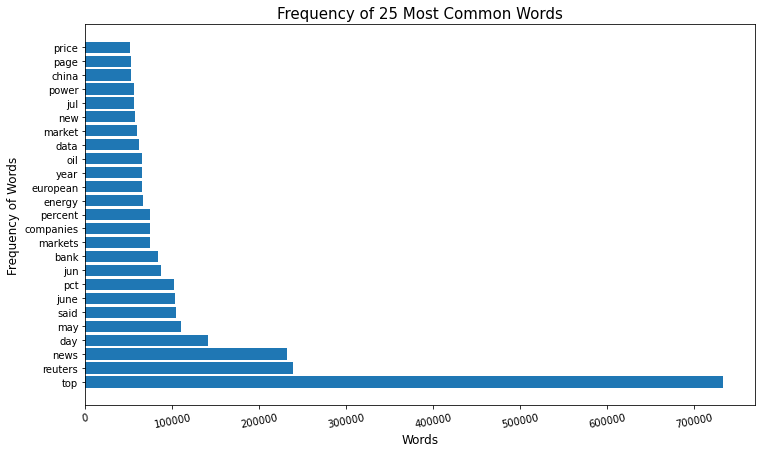

In [ ]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)

plt.figure(figsize=(12,7))
# plt.margins(0.02)
plt.barh(x, y)

plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency of Words', fontsize=12)

plt.yticks(fontsize=10)
plt.xticks(rotation=11, fontsize=10)

plt.title('Frequency of 25 Most Common Words', fontsize=15)
plt.show()

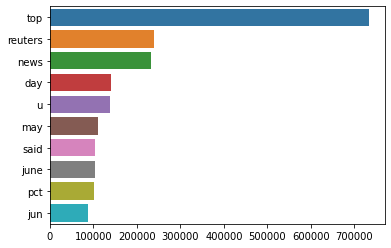

In [ ]:
x, y= [], []
for word,count in mostcommon_small[:10]:
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [ ]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
top_n_bigrams=get_top_ngram(df_selected_features['clean_text'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))


#Bigram Analysis

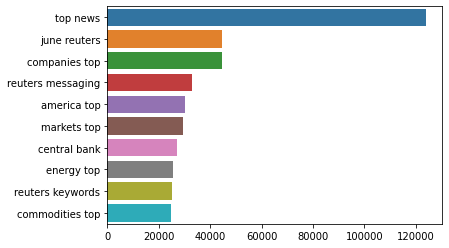

In [ ]:
sns.barplot(x=y,y=x)

#Trigram Analysis

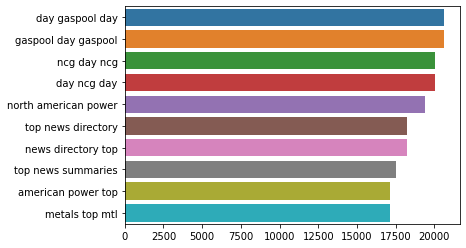

In [ ]:
top_tri_grams=get_top_ngram(df_selected_features['clean_text'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

# Timeline Graph

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


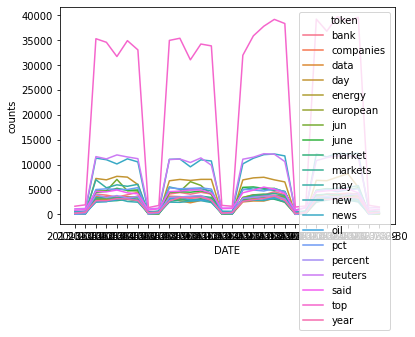

In [ ]:
import seaborn as sns 

df_timeline = df_date_token[df_date_token['token'].isin(most_20_frequent_words['token'].tolist())]

sns.lineplot(x='DATE', y='counts', data=df_timeline, hue='token')

# Use prophet to predict the most repeated words in next 30 days


In [ ]:
from fbprophet import Prophet


In [ ]:
for index, row in most_20_frequent_words.iterrows():
  token = str(row['token'])

  print(token)

  # Using prophet to predic the number of times the word appears in next 30 days

  df_prophet = df_timeline[df_timeline['token'] == token][['DATE', 'counts']]
  df_prophet.columns = ['ds', 'y']

  df_prophet['ds']= pd.to_datetime(df_prophet['ds'])

  # define the model
  model = Prophet()

  # fit the model
  model.fit(df_prophet)

  future = model.make_future_dataframe(periods=30, include_history=False)
  forecast = model.predict(future)


  max_times = forecast['yhat'].max()
  # print(forecast['yhat'])

  
  most_20_frequent_words.at[index, 'latest records'] = df_prophet['y'][-1:].values[0]
  most_20_frequent_words.at[index, 'forecast in next 30 days'] = max_times

  print(f'{token} would be appeared at maxium {max_times} times in one day in the next 30 days')

# From the below table, we can see that after 30 days, which word would be the most repeated word
- The first column is the latest ranking
- The [index] column is the previous ranking
=> So, we can see that the ranking is changed since some words become more popular than others

In [ ]:
most_20_frequent_words.sort_values(by=['forecast in next 30 days'], ascending=False).reset_index()

,index,token,counts,forcast in next 30 days,latest records
0,0,top,733333,42113.880637,1499.0
1,2,news,231730,13052.439379,640.0
2,1,reuters,238467,12411.850754,1398.0
3,3,day,141250,7391.520598,174.0
4,6,june,103145,5504.538845,553.0
5,4,may,110027,5163.515117,358.0
6,5,said,103855,5132.539561,1039.0
7,7,pct,102411,5006.468977,352.0
8,10,markets,74765,4444.084003,230.0
9,9,bank,83233,4291.186155,242.0


#Modelling

In [160]:
df_date_token

,DATE,token,counts
742371,2013-06-26,top,39732
815780,2013-06-28,top,39609
669573,2013-06-24,top,39240
574045,2013-06-20,top,39191
779689,2013-06-27,top,38805
...,...,...,...
624839,2013-06-23,akino,1
427980,2013-06-16,maurizio,1
624837,2013-06-23,akdag,1
624836,2013-06-23,ajmi,1


In [166]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [164]:
training_data, testing_data = train_test_split(most_100_frequent_words,random_state = 2000)

In [47]:
tfidf_vectorizer = TfidfVectorizer()

In [36]:
     Y_train=training_data['counts'].values
     Y_test=testing_data['counts'].values

In [37]:
Y_train

array([ 30631,  35079,  29885,  29812,  44177,  28661,  26109,  83233,
        25393,  74595,  27234,  27038,  43383,  74765,  49359,  25678,
        26814,  26466,  32314,  66503,  26094,  39506,  38379,  29030,
        26359,  51235, 102411,  56031,  51603,  56178, 103855,  41168,
        32698,  28785,  31043,  27260,  31460,  42086,  31659,  27485,
        33217,  43758,  28676, 231730,  42498,  30951,  87051,  30078,
        30903,  35205,  64770, 110027,  38326,  29378,  25812,  38207,
        25972,  35531,  39334,  52561,  74066, 238467,  37376,  30527,
        65066,  65435,  32402,  33487,  25900,  48112,  25272,  28193,
        28015,  29175,  32640])

In [165]:
x_train = tfidf_vectorizer.transform (training_data['token'].values)
x_test=tfidf_vectorizer.transform (testing_data['token'].values)

In [61]:
x_train,x_test

(<75x25 sparse matrix of type '<class 'numpy.float64'>'
 	with 0 stored elements in Compressed Sparse Row format>,
 <25x25 sparse matrix of type '<class 'numpy.float64'>'
 	with 25 stored elements in Compressed Sparse Row format>)

In [62]:
linear_regression = LinearRegression()
model=linear_regression.fit(x_train,Y_train)

The exact solution is  x = 0                              


In [54]:
x_test

<25x25 sparse matrix of type '<class 'numpy.float64'>'
	with 25 stored elements in Compressed Sparse Row format>

In [66]:
pred = model.predict(x_test)

In [110]:
pred

array([47060.96, 47060.96, 47060.96, 47060.96, 47060.96, 47060.96,
       47060.96, 47060.96, 47060.96, 47060.96, 47060.96, 47060.96,
       47060.96, 47060.96, 47060.96, 47060.96, 47060.96, 47060.96,
       47060.96, 47060.96, 47060.96, 47060.96, 47060.96, 47060.96,
       47060.96])

In [111]:
 best_n = np.argsort(pred)

In [112]:
best_n

array([ 0, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 23, 12, 10,  9,  8,  7,
        6,  5,  4,  3,  2,  1, 11, 24])

In [113]:
model.coef_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [114]:
featue_col = most_100_frequent_words['token']

In [116]:
pred_bestn =[[featue_col[predicted_val] for predicted_val in best_n]]

In [117]:
pred_words=[ item[::-1] for item in pred_bestn]

In [118]:
pred_word

[['price',
  'companies',
  'reuters',
  'news',
  'day',
  'may',
  'said',
  'june',
  'pct',
  'jun',
  'bank',
  'markets',
  'percent',
  'page',
  'energy',
  'european',
  'year',
  'oil',
  'data',
  'market',
  'new',
  'jul',
  'power',
  'china',
  'top']]